# Decision Tree Multiclass classification

# Importing Libraries and Overview of data

In [2]:

#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

 #plot for DT

In [37]:
from sklearn import tree
from IPython.display import Image
from subprocess import check_call

FE(Recurssive Feature Elemination ) RFE is used on testing data <br>
ts a feature selection method <br>
lso used as feature elinate and then select the remaining feature

In [38]:
from sklearn.feature_selection import RFE

#about the files<br>
.  Sequence Name: Accession number for the SWISS-PROT database
.  mcg: McGeoch's method for signal sequence recognition.
 #3.  gvh: von Heijne's method for signal sequence recognition.
 #4.  lip: von Heijne's Signal Peptidase II consensus sequence score.

In [39]:
 #          Binary attribute.
#  5.  chg: Presence of charge on N-terminus of predicted lipoproteins.
#	   Binary attribute.
#  6.  aac: score of discriminant analysis of the amino acid content of
#	   outer membrane and periplasmic proteins.
#  7. alm1: score of the ALOM membrane spanning region prediction program.
#  8. alm2: score of ALOM program after excluding putative cleavable signal
#regions from the sequence.

.# Class Distribution. The class is the localization site. Please see Nakai &<
#	       Kanehisa referenced above for more details.

In [40]:
 # cp  (cytoplasm)                                    143
 # im  (inner membrane without signal sequence)        77               
 # pp  (perisplasm)                                    52
 # imU (inner membrane, uncleavable signal sequence)   35
 # om  (outer membrane)                                20
 # omL (outer membrane lipoprotein)                     5
 # imL (inner membrane lipoprotein)                     2
 # imS (inner membrane, cleavable signal sequence)      2

#So here our Y varible which has to do multiclass classification is "lsp"

#Reading and overvviewing the files

In [41]:
ecl=pd.read_csv('F:\DATA SCIENCE\python\py\ALGORITHMS\Decision tree\ecoli.csv')
ecl.describe()
#ecl.shape


,mcg,gvh,lip,chg,aac,alm1,alm2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [42]:
ecl.head()
ecl.tail()
ecl

,sequence_name,mcg,gvh,lip,chg,aac,alm1,alm2,lsp
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


DA

In [43]:
ecl.columns
ecoli=ecl.drop('sequence_name',axis=1)
ecoli.shape

(336, 8)

# Check for singularities
#Column name "lip"

In [44]:
ecoli.lip.value_counts()
326/len(ecoli)#so here in lip column there is 326 singularity (97.02)

0.9702380952380952

b)#Columnn name is "chg"

In [45]:
ecoli.chg.value_counts()
335/len(ecoli)
#here is singalurity of 99.70 

0.9970238095238095

#c)Column name is "lsp"

In [46]:
ecoli.lsp.value_counts()
#here is no sigularity

cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: lsp, dtype: int64

#Shuffle the data to get the exact preditions

In [47]:
ecoli=ecoli.sample(frac=1)
ecoli

,mcg,gvh,lip,chg,aac,alm1,alm2,lsp
8,0.20,0.44,0.48,0.5,0.46,0.51,0.57,cp
59,0.42,0.38,0.48,0.5,0.54,0.34,0.43,cp
189,0.61,0.52,0.48,0.5,0.54,0.67,0.52,im
35,0.36,0.54,0.48,0.5,0.41,0.38,0.46,cp
196,0.51,0.40,0.48,0.5,0.57,0.62,0.67,im
...,...,...,...,...,...,...,...,...
108,0.49,0.43,0.48,0.5,0.49,0.30,0.40,cp
86,0.50,0.49,0.48,0.5,0.49,0.46,0.53,cp
42,0.40,0.50,0.48,0.5,0.45,0.39,0.47,cp
168,0.63,0.50,0.48,0.5,0.59,0.85,0.86,im


# Splitting the data into train and test

In [48]:
trainx,testx,trainy,testy=train_test_split(ecoli.drop('lsp',axis=1),
                                           ecoli.lsp,
                                           test_size=0.2)
print('trainx={},trainy={},testx={},testy={}'.format(trainx.shape,
                                                      trainy.shape,
                                                      testx.shape,
                                                      testy.shape))

trainx=(268, 7),trainy=(268,),testx=(68, 7),testy=(68,)


#Cp(complaxity parameter isin R is called as CCP cost complaxity parameter in python)
i)Entropy model
ii)Gini model

# Model building

#1)Entropy model 

In [49]:
m1=DecisionTreeClassifier(criterion="entropy").fit(trainx,trainy)

#Plot the decision tree

In [50]:
features=list(ecoli.columns)
features.remove('lsp')
classes=ecoli.lsp.unique()

#Create the tree

In [51]:
tree.export_graphviz(m1,'m1tree.dot',filled=True,rounded=True,
                     feature_names=features,class_names=classes)

#Conevert dot to image file

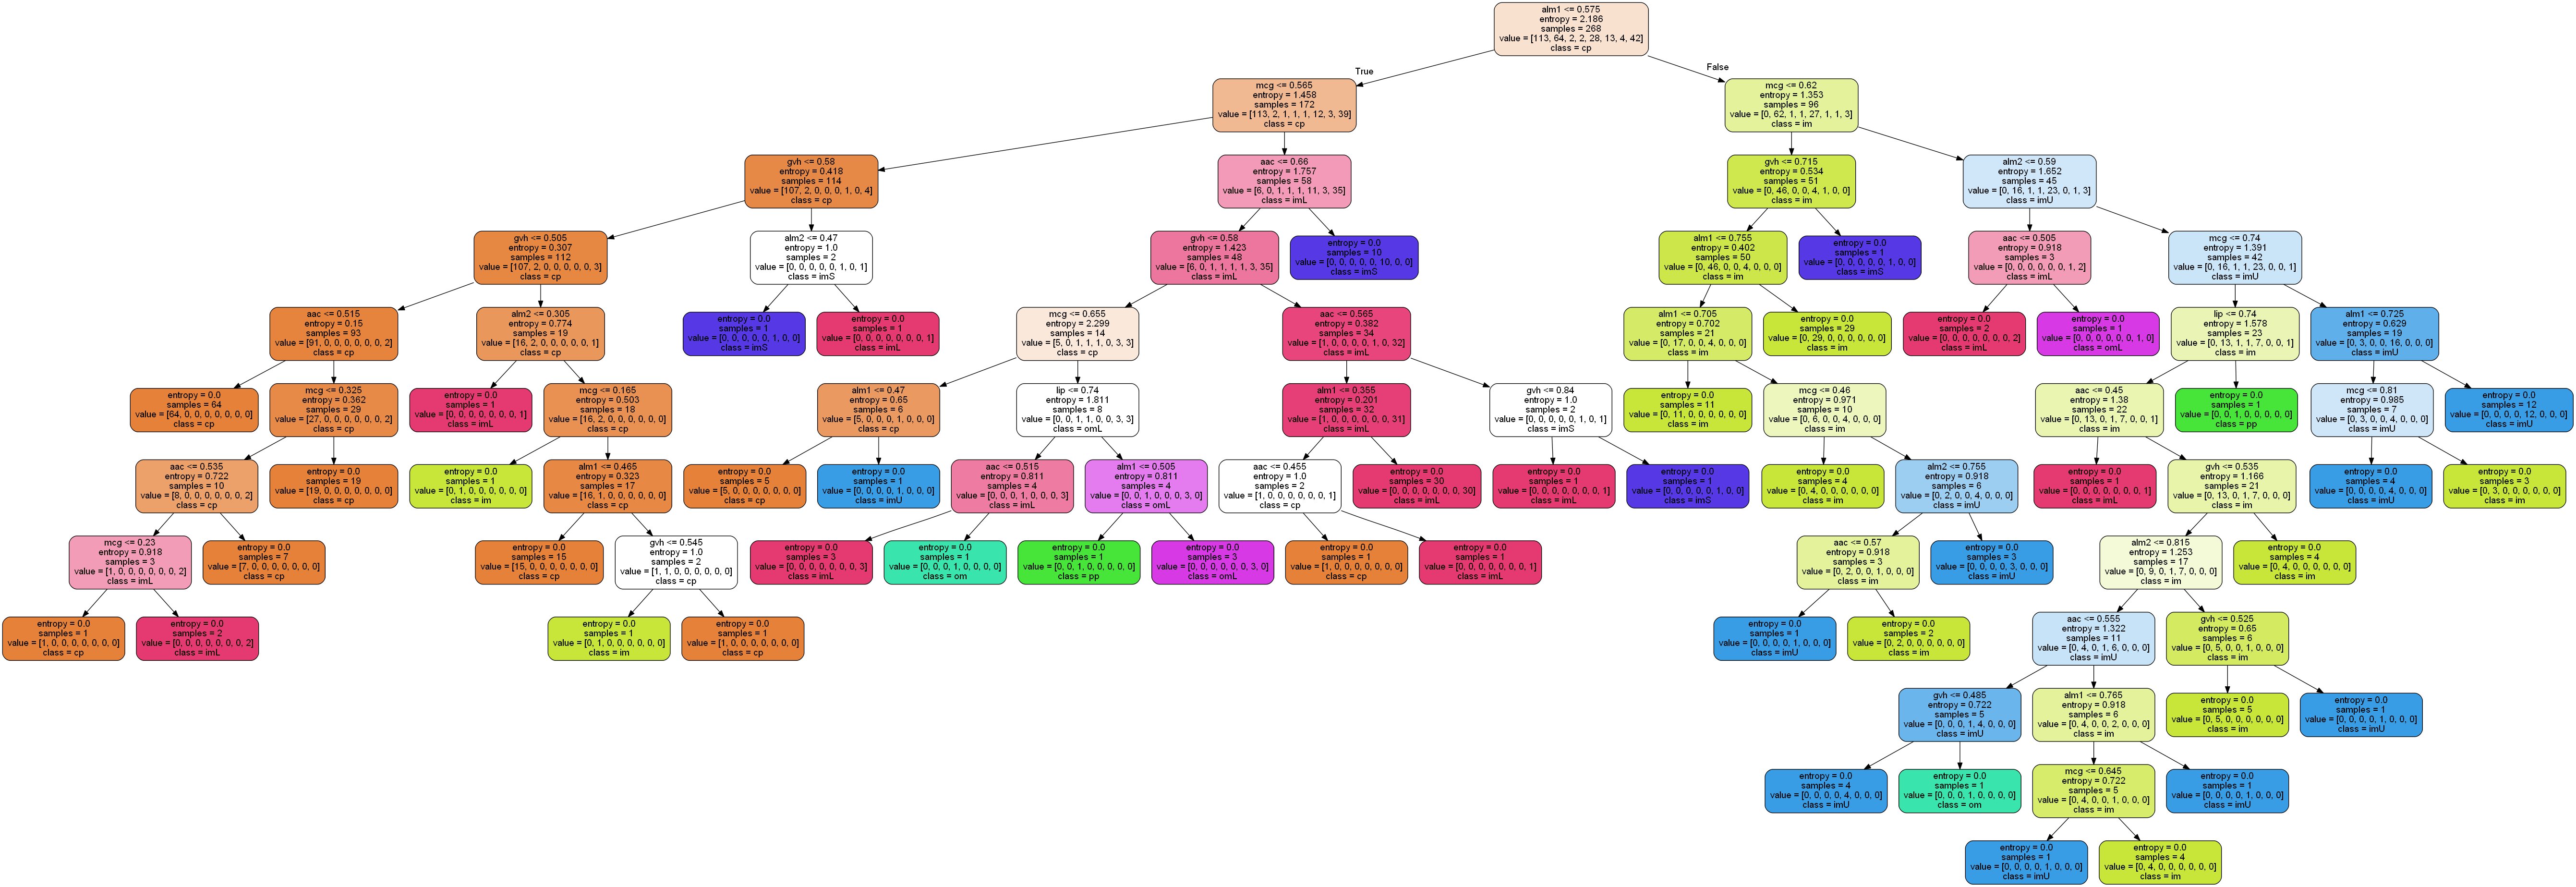

In [52]:
check_call(['dot','-Tpng','m1tree.dot','-o','m1tree.png'])
Image(filename='m1tree.png')

#Predictions

In [53]:
p1=m1.predict(testx) 
p1

array(['pp', 'cp', 'cp', 'cp', 'pp', 'imU', 'im', 'pp', 'im', 'omL', 'pp',
       'cp', 'om', 'cp', 'cp', 'im', 'im', 'im', 'im', 'pp', 'cp', 'cp',
       'cp', 'im', 'cp', 'cp', 'cp', 'imU', 'cp', 'cp', 'im', 'cp', 'cp',
       'pp', 'imU', 'cp', 'cp', 'imU', 'im', 'pp', 'imU', 'pp', 'im',
       'im', 'pp', 'cp', 'cp', 'im', 'om', 'pp', 'om', 'cp', 'cp', 'cp',
       'pp', 'cp', 'cp', 'imU', 'cp', 'im', 'cp', 'om', 'omL', 'cp', 'cp',
       'im', 'cp', 'pp'], dtype=object)

#Confuision metrics and accuracy score

#1) Accuracy score

In [54]:
accuracy_score(testy, p1)

0.8529411764705882

i) Confusion matrix

In [55]:
confusion_matrix(testy,p1)

array([[29,  0,  0,  0,  0,  1],
       [ 0, 11,  2,  0,  0,  0],
       [ 0,  3,  4,  0,  0,  0],
       [ 0,  0,  0,  4,  1,  2],
       [ 0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  9]], dtype=int64)

In [56]:
df=pd.DataFrame({'actual':testy,'predicted':p1})
pd.crosstab(df.actual, df.predicted,margins=True)

predicted,cp,im,imU,om,omL,pp,All
actual,,,,,,,
cp,29,0,0,0,0,1,30
im,0,11,2,0,0,0,13
imU,0,3,4,0,0,0,7
om,0,0,0,4,1,2,7
omL,0,0,0,0,1,0,1
pp,1,0,0,0,0,9,10
All,30,14,6,4,2,12,68


In [57]:
Model1_basic=(classification_report(testy,p1))
print(Model1_basic)


              precision    recall  f1-score   support

          cp       0.97      0.97      0.97        30
          im       0.79      0.85      0.81        13
         imU       0.67      0.57      0.62         7
          om       1.00      0.57      0.73         7
         omL       0.50      1.00      0.67         1
          pp       0.75      0.90      0.82        10

    accuracy                           0.85        68
   macro avg       0.78      0.81      0.77        68
weighted avg       0.87      0.85      0.85        68



reate the dataframe to store the name and thier score<br>
igher score = higher significance

In [58]:
impf=pd.DataFrame({'features':trainx.columns,'score':m1.feature_importances_})
#sort the data by score 
impf.sort_values('score',ascending=False,inplace=True)
impf

,features,score
5,alm1,0.405675
0,mcg,0.303518
4,aac,0.116295
1,gvh,0.105637
6,alm2,0.045089
2,lip,0.023785
3,chg,0.000000


#Plot the significant features

Text(0, 0.5, 'Features')

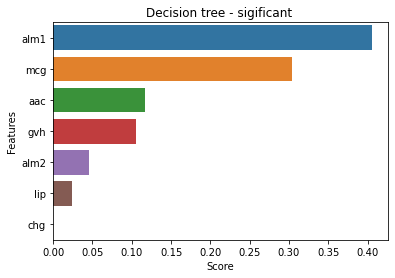

In [59]:
import matplotlib.pyplot as plt
sns.barplot(x=impf.score,y=impf.features)
plt.title('Decision tree - sigificant ')
plt.xlabel('Score')
plt.ylabel('Features')

#Decision tree pruning

In [60]:
dt_path=m1.cost_complexity_pruning_path(trainx, trainy)

#Cost complexity parameter values

In [61]:
ccp_alphas=dt_path.ccp_alphas

#ind  the best ccp_alpha value

In [62]:
results=[]

In [63]:
for cp in ccp_alphas:
    m=DecisionTreeClassifier(ccp_alpha=cp).fit(trainx,trainy)
    results.append(m)
    
#calculate the score for train and test
trg_score=[r.score(trainx,trainy)for r in results]
test_score=[r.score(testx,testy)for r in results]

#Plot the score

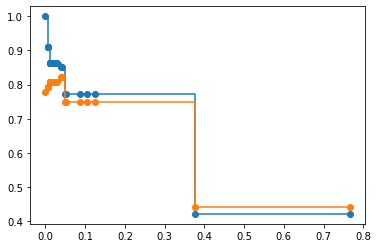

In [64]:
fig,ax=plt.subplots()
ax.plot(ccp_alphas,trg_score,marker='o',label='train',
        drawstyle='steps-post')
ax.plot(ccp_alphas,test_score,marker='o',label='test',drawstyle='steps-post')

In [65]:
ax.set_xlabel('CCP alphas')
ax.set_ylabel('Accuracy')
ax.set_title('CCP alpha vs Accuracy')
ax.legend()

#Based on the graph ,the besst ccp_alpha = 0.023
#Build the model with this ccp_alpha
#for better resultsexperiment with other ccp_values

In [72]:
m1_1=DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.033).fit(trainx,trainy) 
p1_1=m1_1.predict(testx)

In [73]:
p1_1

array(['pp', 'cp', 'cp', 'cp', 'pp', 'im', 'im', 'pp', 'im', 'pp', 'pp',
       'cp', 'om', 'cp', 'cp', 'im', 'im', 'im', 'im', 'pp', 'cp', 'cp',
       'cp', 'im', 'cp', 'cp', 'cp', 'im', 'cp', 'cp', 'im', 'cp', 'cp',
       'pp', 'imU', 'cp', 'cp', 'im', 'im', 'omL', 'imU', 'pp', 'im',
       'im', 'pp', 'cp', 'cp', 'im', 'om', 'pp', 'om', 'cp', 'cp', 'cp',
       'pp', 'cp', 'cp', 'imU', 'cp', 'im', 'cp', 'om', 'pp', 'cp', 'cp',
       'im', 'cp', 'pp'], dtype=object)

In [74]:
df1_1=pd.DataFrame({'actual':testy,'predicted':p1_1})
df1_1

,actual,predicted
331,pp,pp
51,cp,cp
108,cp,cp
64,cp,cp
306,pp,pp
...,...,...
20,cp,cp
127,cp,cp
184,im,im
106,cp,cp


In [75]:
pd.crosstab(df1_1.actual, df1_1.predicted,margins=True)
Model2_ccp=(classification_report(testy,p1_1))
print(Model2_ccp)
#GInni index is the assignemnt for the next model

              precision    recall  f1-score   support

          cp       0.97      0.97      0.97        30
          im       0.76      1.00      0.87        13
         imU       1.00      0.43      0.60         7
          om       1.00      0.57      0.73         7
         omL       0.00      0.00      0.00         1
          pp       0.69      0.90      0.78        10

    accuracy                           0.85        68
   macro avg       0.74      0.64      0.66        68
weighted avg       0.88      0.85      0.84        68



#Next model: m3 and m4<br>
#Creterion : Gini index<br>
#Follow the same steps as above

#Findout best 4 features #
#Using RFE(Recursive Feature Encore)

In [76]:
cols=list(testx.columns)
#
#specify the number of significance features you want from the model
features = 4

In [77]:
rfe=RFE(m1,features).fit(testx,testy)
support=rfe.support_
ranking=rfe.ranking_

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


#Store it in dataframe

In [78]:
df_rfe=pd.DataFrame({'features':cols,
                     'sopport':support,
                     'ranking':ranking})

#Sort the values in datframe

In [79]:
df_rfe.sort_values('ranking',ascending=True,inplace=True)
print(df_rfe)

  features  sopport  ranking
0      mcg     True        1
4      aac     True        1
5     alm1     True        1
6     alm2     True        1
1      gvh    False        2
2      lip    False        3
3      chg    False        4


#Model  using cretiria of Ginni inddex

In [80]:
m3_G=DecisionTreeClassifier(criterion='gini').fit(trainx,trainy)
p3_g=m3_G.predict(testx)
p3_g

array(['omL', 'cp', 'cp', 'cp', 'pp', 'imU', 'im', 'pp', 'im', 'pp', 'pp',
       'cp', 'om', 'cp', 'cp', 'im', 'im', 'imU', 'im', 'pp', 'cp', 'cp',
       'cp', 'im', 'cp', 'cp', 'cp', 'im', 'cp', 'im', 'im', 'cp', 'cp',
       'pp', 'imU', 'cp', 'im', 'im', 'im', 'pp', 'imU', 'pp', 'im', 'im',
       'pp', 'cp', 'cp', 'imU', 'om', 'pp', 'cp', 'cp', 'cp', 'cp', 'pp',
       'cp', 'cp', 'imU', 'cp', 'imU', 'cp', 'om', 'omL', 'cp', 'cp',
       'imU', 'cp', 'pp'], dtype=object)

In [81]:
Df3=pd.DataFrame({'actual':testy,'predicted':p3_g})
Df3

,actual,predicted
331,pp,omL
51,cp,cp
108,cp,cp
64,cp,cp
306,pp,pp
...,...,...
20,cp,cp
127,cp,cp
184,im,imU
106,cp,cp


In [82]:
pd.crosstab(Df3.actual, Df3.predicted,margins=True)
Model3_Gini=(classification_report(testy,p3_g))
print(Model3_Gini)

              precision    recall  f1-score   support

          cp       0.97      0.93      0.95        30
          im       0.64      0.69      0.67        13
         imU       0.50      0.57      0.53         7
          om       1.00      0.43      0.60         7
         omL       0.00      0.00      0.00         1
          pp       0.67      0.80      0.73        10

    accuracy                           0.76        68
   macro avg       0.63      0.57      0.58        68
weighted avg       0.80      0.76      0.77        68



#Hyper tuning of Model 3 with RFE

In [83]:
trainx=trainx.drop(['aac','chg','lip'],axis=1)
trainx.shape

(268, 4)

In [84]:
testx=testx.drop(['aac','chg','lip'],axis=1)
testx.shape

(68, 4)

#So we just have four columns that are by RFE

In [85]:
M4_RFE=DecisionTreeClassifier(criterion='gini').fit(trainx,trainy)
p4_rfeG=M4_RFE.predict(testx)
p4_rfeG

array(['pp', 'cp', 'cp', 'cp', 'pp', 'imU', 'im', 'pp', 'im', 'pp', 'pp',
       'cp', 'pp', 'cp', 'cp', 'im', 'im', 'imU', 'imU', 'pp', 'cp', 'pp',
       'cp', 'im', 'cp', 'cp', 'cp', 'im', 'cp', 'im', 'im', 'cp', 'cp',
       'pp', 'imU', 'cp', 'cp', 'imU', 'im', 'omL', 'imU', 'pp', 'im',
       'im', 'pp', 'cp', 'cp', 'im', 'om', 'pp', 'cp', 'cp', 'cp', 'cp',
       'pp', 'cp', 'cp', 'imU', 'cp', 'im', 'cp', 'pp', 'pp', 'cp', 'cp',
       'im', 'cp', 'pp'], dtype=object)

In [86]:
DF4=pd.DataFrame({'actual':testy,'predicted':p4_rfeG})
DF4

,actual,predicted
331,pp,pp
51,cp,cp
108,cp,cp
64,cp,cp
306,pp,pp
...,...,...
20,cp,cp
127,cp,cp
184,im,im
106,cp,cp


In [87]:
pd.crosstab(DF4.actual, DF4.predicted,margins=True)
Model4_RFEG=(classification_report(testy,p4_rfeG))
print(Model4_RFEG)

              precision    recall  f1-score   support

          cp       0.93      0.90      0.92        30
          im       0.79      0.85      0.81        13
         imU       0.71      0.71      0.71         7
          om       1.00      0.14      0.25         7
         omL       0.00      0.00      0.00         1
          pp       0.56      0.90      0.69        10

    accuracy                           0.78        68
   macro avg       0.67      0.58      0.56        68
weighted avg       0.82      0.78      0.76        68



#Final result at one point

In [90]:
print(Model1_basic)
print(Model2_ccp)
print(Model3_Gini)
print(Model4_RFEG)

              precision    recall  f1-score   support

          cp       0.97      0.97      0.97        30
          im       0.79      0.85      0.81        13
         imU       0.67      0.57      0.62         7
          om       1.00      0.57      0.73         7
         omL       0.50      1.00      0.67         1
          pp       0.75      0.90      0.82        10

    accuracy                           0.85        68
   macro avg       0.78      0.81      0.77        68
weighted avg       0.87      0.85      0.85        68

              precision    recall  f1-score   support

          cp       0.97      0.97      0.97        30
          im       0.76      1.00      0.87        13
         imU       1.00      0.43      0.60         7
          om       1.00      0.57      0.73         7
         omL       0.00      0.00      0.00         1
          pp       0.69      0.90      0.78        10

    accuracy                           0.85        68
   macro avg       0.74